In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dados_geral = pd.read_csv('survey_results_public.csv')
dados.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

## Conhecendo o DataSet

O dataset levantado pelo StackOverflow contém bastante informação porém não precisaremos de todas essas informações, por isso selecionaremos somente os campos listados abaixo:

*   `Age1stCode`: idade que iniciou os estudos sobre programação.
*   `ConvertedComp`: valor corresponde ao salário anual convertido para dóllar USD na data 2020-02-19, assumindo 12 meses de trabalho e 50 semanas de trabalho.
*   `WorkWeekHrs`: média de quantas horas trabalhadas por semana.
*   `YearsCodePro`: quantidade de anos programando de forma profissional, excluindo período de estudo/faculdade.



In [ ]:
df_valores = dados_geral.loc[:, ['Age1stCode', 'ConvertedComp', 'WorkWeekHrs', 'YearsCodePro']]

In [ ]:
df_valores.shape

(64461, 4)

In [ ]:
df_valores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age1stCode     57900 non-null  object 
 1   ConvertedComp  34756 non-null  float64
 2   WorkWeekHrs    41151 non-null  float64
 3   YearsCodePro   46349 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


In [ ]:
df_valores.dtypes

Age1stCode        object
ConvertedComp    float64
WorkWeekHrs      float64
YearsCodePro      object
dtype: object

In [ ]:
df_valores.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [ ]:
df_valores.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [ ]:
df_valores.head()

,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCodePro
0,13,NaN,50.0,27
1,19,NaN,NaN,4
2,15,NaN,NaN,NaN
3,18,NaN,40.0,4
4,16,NaN,NaN,8


Ao visualizarmos o resultado do comando anterior já percebemos de início a presença de valores nulos em 3 das 4 colunas dos nossos dados selecionados para a análise, para confirmar se todas as colunas possuem valores faltantes iremos realizar uma verificação nos dados.

In [ ]:
df_valores.isna().any()

Age1stCode       True
ConvertedComp    True
WorkWeekHrs      True
YearsCodePro     True
dtype: bool

In [ ]:
df_valores.isna().sum()

Age1stCode        6561
ConvertedComp    29705
WorkWeekHrs      23310
YearsCodePro     18112
dtype: int64

Como podemos observar, todas as colunas possuem valores faltantes sendo as colunas referentes a salário e horário de trabalho semanal com maior número de dados faltantes, isso ocorre pois a pesquisa não classificou esses campos como obrigatórios e por isso foi possível deixar o questionário em branco nessas questões. 

Para lidar com esses valores nulos e deixar o dataset utilizável para a análise vamos aplicar o processo de Data Cleaning.

## Data Cleaning


### Tipos de dados



Ao observamos os tipos de cada coluna, reparamos que as colunas Age1stCode e YearsCodePro são identificadas como `object`, dando uma olhada nos valores presentes em cada uma dessas colunas identificamos os classificadores *Younger than 5 yeas*, *Older than 85* e *Less than 1 year*, *More than 50 years* por coluna respectivamente. 

As informações nesse formato não é interessante para a nossa análise, dessa forma vamos converter essas informações para valores numéricos inteiros.



*   ´Younger than 5 yeas´: Substituiremos pelo valor 4, referenciando a idade de 4 anos e anteriores.
*   ´Older than 85´ : substituiremos pelo valor 86, representando valores de idade a partir de 86 anos em diante.
*   ´Less than 1 year´ : substituiremos pelo valor 0, representando o período de meses que ainda não completaram 1 ano.
*   ´More tahn 50 years´ : substituíremos pelo valor 51, representando idades a partir de 51 anos.


Como esses serão os valores mínimos e máximos para as colunas Age1stCode e YearsCodePro, devemos levar em consideração na nossa análise que os valores extremos representam na verdade um intervalo que foi desconsiderado de forma geral na análise.




In [ ]:
df_valores.Age1stCode = df_valores.Age1stCode.replace({'Younger than 5 years' : 4, 'Older than 85' : 86}).astype(float)

In [ ]:
df_valores.YearsCodePro = df_valores.YearsCodePro.replace({'Less than 1 year' : 0, 'More than 50 years' : 51}).astype(float)

In [ ]:
df_valores.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5.,  4.,
       28., 38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36.,
       54., 48., 56., 45., 44., 34., 86., 39., 51., 68., 50., 37., 47.,
       43., 52., 85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

### Dados faltantes 

Nos casos onde é encontrado representações variadas para valores inválidos seria possível criar uma lista mapeando os carácteres inválidos e informar na leitura do arquivo .csv, como no exemplo mostrado a seguir.

```python
# Exemplo
missing_values = ['n/a','-']
df = pd.read_csv('survey_results_public.csv', na_values=missing_values)
````

No caso do nosso datase, o Stackoverflow já classificou os valores faltantes como `NaN ` e por isso não precisamos buscar por múltiplos padrões para identificar valores inválidos.

Existem algumas abordagens para lidar com dados faltantes, você pode preencher os valores ausentes com a mediana da coluna ou com o valor mais frequente. Nos casos onde o dataset é muito grande e a quantidade de valores faltantes é muito pequeno pode ser analisado a possibilidade de excluir as linhas com valores faltantes, desde é claro que se tenha a noção do impacto que essa exclusão causará na sua análise. 

Para nossa análise faremos o preenchimento dos valores faltantes com a mediana da coluna, visto que os valores para o salário anual variam bastante e o agrupamento por valor mais frequente não representa muito bem a maioria, e isso poderia impactar negativamente na classificação.


In [ ]:
mediana_convertedComp = df_valores.ConvertedComp.median()
mediana_convertedComp

54049.0

In [ ]:
mediana_Age1stCode = df_valores.Age1stCode.median()
mediana_Age1stCode

15.0

In [ ]:
mediana_YearsCodePro = df_valores.YearsCodePro.median()
mediana_YearsCodePro

6.0

In [ ]:
mediana_WorkWeekHrs = df_valores.WorkWeekHrs.median()
mediana_WorkWeekHrs

40.0

In [ ]:
df_valores.fillna({'ConvertedComp': mediana_convertedComp, 'Age1stCode' : mediana_Age1stCode, 
                   'YearsCodePro' : mediana_YearsCodePro, 'WorkWeekHrs' : mediana_WorkWeekHrs}, 
                   inplace=True)

E agora verificando a quantidade de valores nulos podemos confirmar que todos os valores foram substituídos.

In [ ]:
df_valores.isna().sum()

Age1stCode       0
ConvertedComp    0
WorkWeekHrs      0
YearsCodePro     0
dtype: int64

In [ ]:
# converter os tipos das colunas Age1stCode e YearsCodePro
df_valores = df_valores.astype({'Age1stCode' : int, 'YearsCodePro' : int})

In [ ]:
df_valores.head()

,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCodePro
0,13,54049.0,50.0,27
1,19,54049.0,40.0,4
2,15,54049.0,40.0,6
3,18,54049.0,40.0,4
4,16,54049.0,40.0,8


## Análises

### Estatística descritiva

In [ ]:
df_valores.describe().round(2)

,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCodePro
count,64461.00,64461.00,64461.00,64461.00
mean,15.37,80849.98,40.50,7.79
std,5.02,168430.45,14.24,6.80
min,4.00,0.00,1.00,0.00
25%,13.00,49160.00,40.00,4.00
50%,15.00,54049.00,40.00,6.00
75%,18.00,58368.00,40.00,9.00
max,86.00,2000000.00,475.00,51.00


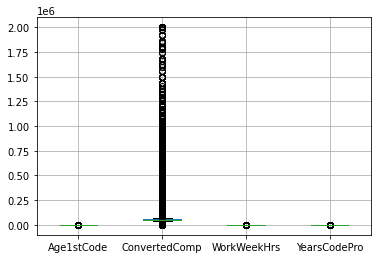

In [ ]:
# plot gráfico boxplot
df_valores.boxplot()

#### Tratamento de Outliers

Como podemos ver através do gráfico boxplot, existe muitos outliers no nosso dataset, por isso é importante tratar esses outliers.

In [ ]:
convertedComp = df_valores.ConvertedComp
convertedComp

0        54049.0
1        54049.0
2        54049.0
3        54049.0
4        54049.0
          ...   
64456    54049.0
64457    54049.0
64458    54049.0
64459    54049.0
64460    54049.0
Name: ConvertedComp, Length: 64461, dtype: float64

In [ ]:
Q1 = convertedComp.quantile(.25)
Q3 = convertedComp.quantile(.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
selecionados = (convertedComp >= limite_inferior) & (convertedComp <= limite_superior)
df_valores_sem_outliers = df_valores[selecionados]

In [ ]:
df_valores_sem_outliers.describe()

,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCodePro
count,40059.000000,40059.000000,40059.000000,40059.000000
mean,15.464665,53708.286627,40.342202,7.297411
std,5.113663,5395.528363,12.663950,5.881552
min,4.000000,35352.000000,1.500000,0.000000
25%,13.000000,54049.000000,40.000000,5.000000
50%,15.000000,54049.000000,40.000000,6.000000
75%,18.000000,54049.000000,40.000000,7.000000
max,86.000000,72154.000000,475.000000,51.000000


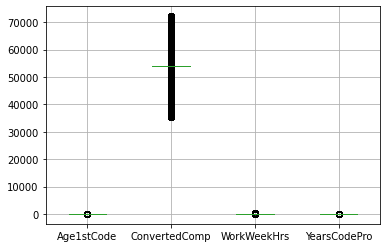

In [ ]:
df_valores_sem_outliers.boxplot()

Podemos ver que eliminamos uma parte dos outliers identificados previamente, mas apareceram novos outliers, isso é normal no processo de tratamento dos dados, o ponto de tratamento deve refletir a análise que se queira fazer. 

In [ ]:
for columnName, columnData in df_valores_sem_outliers.iteritems():
  Q1 = df_valores_sem_outliers[columnName].quantile(.25)
  Q3 = df_valores_sem_outliers[columnName].quantile(.75)

  IIQ = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IIQ
  limite_superior = Q3 + 1.5 * IIQ

  selecionados = (df_valores_sem_outliers[columnName] >= limite_inferior) & (df_valores_sem_outliers[columnName] <= limite_superior)

  df_valores_sem_outliers = df_valores_sem_outliers[selecionados]

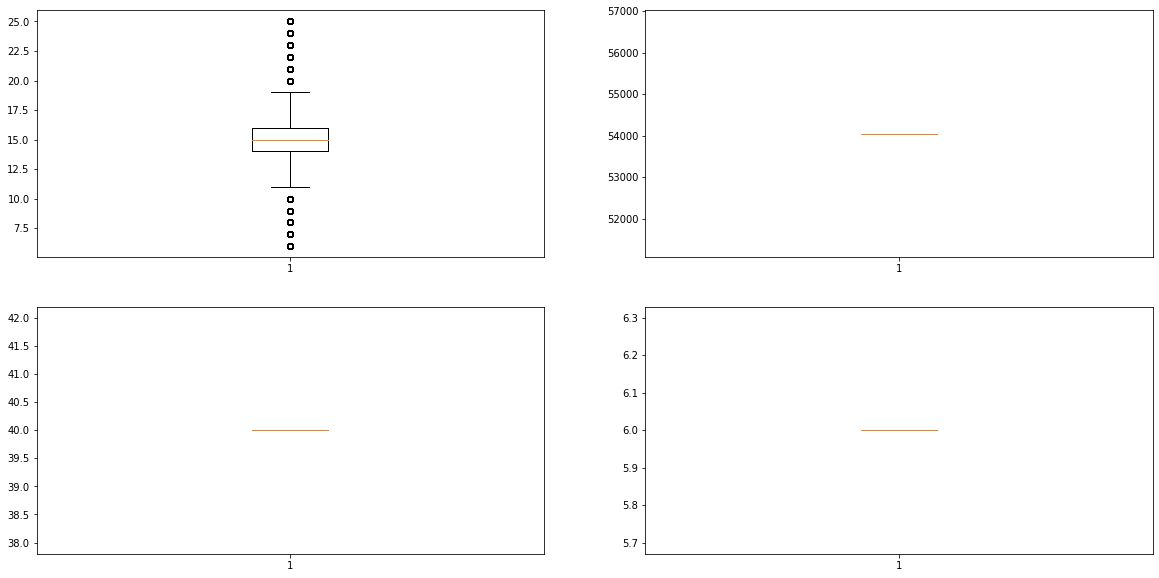

In [ ]:
fig, arrbp = plt.subplots(2, 2, figsize=(20,10))

arrbp[0,0].boxplot(df_valores_sem_outliers.Age1stCode)
arrbp[0,1].boxplot(df_valores_sem_outliers.ConvertedComp)
arrbp[1,0].boxplot(df_valores_sem_outliers.WorkWeekHrs)
arrbp[1,1].boxplot(df_valores_sem_outliers.YearsCodePro)

plt.show()

### Matriz de correlação



De modo geral:

*   Associação negativa: enquanto uma variável "sobe" a outra "desce".
*   Associação positiva: quando uma variável "sobe" a outra também "sobe".

In [ ]:
df_valores.corr().round(4)

,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCodePro
Age1stCode,1.0,NaN,NaN,NaN
ConvertedComp,NaN,NaN,NaN,NaN
WorkWeekHrs,NaN,NaN,NaN,NaN
YearsCodePro,NaN,NaN,NaN,NaN


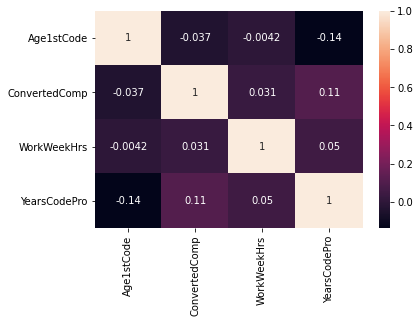

In [ ]:
sns.heatmap(df_valores.corr(), annot=True)